<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT421/blob/main/herrera_module_B.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **MODULE B:** Interpolation: Part 1
# **AUTHOR:** Benjamin Joseph L. Herrera
# **CLASS:** MAT 421
# **DATE:** 21 JAN 2024

## ⚠️ Run these commandes prior to running anything

In [6]:
!pip install scipy
!pip install matplotlib

## What is Interpolation?

Assume we have an ordered set of input values $X$ and a set of output values $Y$ where $x_{i}$ correlates to $y_{i}$ for $i = 1, \dots, n$. There is a function (a.k.a. interpolation function) $f$ where $f(X) = Y$ for all $x_{i}$ and $y_{i}$ such that $i = 1, \dots, n$. When a new value $x^{*}$ is introduced, we can interpolate its output value with our estimation function. Unlike regresion, the interpolation function has to pass through every point in the graph if $(X, Y)$ were to plotted out. How can we determine such a function $f$? Let's find out!

## Method 1: Linear Interpolation

To figure out a function $f$, let the values inside $X$ be in increasing order. Let $x$ be a "foreign" value such that $x_{i} < x < x_{i+1}$. We can then define our interpolation function as:

$$f(x) = y_{i} + \frac{(y_{i+1}-y_{i})(x-x_{i})}{(x_{i+1}-x_{i})}$$

For example, let $X$ be an ordered set where an element positioned at index $i$ correspond to an element in $Y$ positioned at index $i$:

$$X = \{10, 20, 30, 40, 50, 60, 70, 80, 90, 100\}$$

$$Y = \{42, 56, 88, 86, 9, 10, 21, 451, 96, 11\}$$

Given a value of $x^{*} = 15$, we can obsserve that $10 < x^{*} < 20$. We can then calculate $f(15)$ as:

$$f(15) = 42 + \frac{(56-42)(15-10)}{(20-10)} = 49

Let's try to use `sci-py` and `matplotlib` to compute these values.

In [7]:
# Imports
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

In [8]:
# X and Y sets
X = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Y = [42, 56, 88, 86, 9, 10, 21, 451, 96, 11]

# Linear interpolation function of X and Y
f_linear = interp1d(X, Y)

# Interpolation of 15
x_star = f_linear(15)

# Print the value
print(x_star)

49.0


Let's take a visual look at this interpolation:

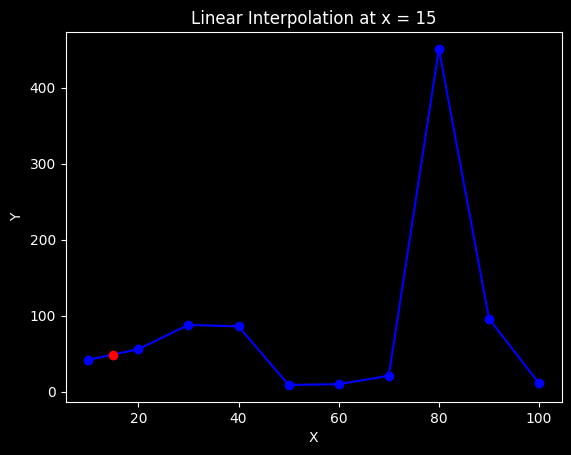

In [9]:
# Plot
plt.style.use('dark_background')
plt.plot(X, Y, '-ob')
plt.plot(15, x_star, 'ro')
plt.title('Linear Interpolation at x = 15')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

With this plot shown above, you can see that the interpolation function touches all points when $(X, Y)$ are plotted onto the graph. The interpolation of the value of 15 lands, closely to the function's interpolation. An issue with linear interpolation is that it is not continue due to its very sharp edges. So, let's look at another method that is continuous.

## Method 2: Cubic Spline Interpolation

Another method is Cubic Spline Interpolation. In this method, we represent the interpolation function as a set of piecewise polynomial functions (specifically, cubic functions). When X and Y are plotted to a graph, there is a piecewise polynomial function that connects $(x_{i}, y_{i})$ and $(x_{i+1}, y_{i+1})$. This polynomial function can be defined as $P_{i}(x) = a_{i}x^3 + b_{i}x^2 + c_{i}x + d$ where $x_i \leq x \leq x_{i+1}$ for $i=1, \dots, n-1$ and where $a_{i}$, $b_{i}$, $c_{i}$, $d_{i}$ are determined constants. This means that if $|X| = n$, then there are $n-1$ polynomial piecewise functions and $4\cdot(n-1)$ constants to determine.

To build our cubic spline interpolation function, we want every polynomial function to touch $(x_{i}, y_{i})$ and $(x_{i+1}, y_{i+1})$. This gives us $2 * (n-1)$ equations:

$$P_{i}(x_i) = y_{i}$$

$$P_{i+1}(x_i) = y_{i+1}$$

for $i = 1, \dots, n-1$.

To ensure that these cubic functions are continuous and that they are smoothly connected to each other by order, we need to have their first and second derivatives continuous. This now gives us $2\dots(n-2)$ equations:

$$P^{'}_{i}(x_{i+1}) = P^{'}_{i+1}(x_{i+1})$$

$$P^{''}_{i}(x_{i+1}) = P^{''}_{i+1}(x_{i+1})$$

for $i = 2, ..., n - 1$.

Finally, to ensure that we can determine the constants of $P_i(x)$ we set:

$$P^{''}_{1}(x_{1}) = 0$$

$$P^{''}_{n-1}(x_{n}) = 0$$

Using the $X$ and $Y$ values from the example in `Method 1`, we can use `sci-py`, `numpy`, and `matplotlib` to plot the cubic spline interpolation function.

In [10]:
# Imports
from scipy.interpolate import CubicSpline
import numpy

In [18]:
# Cubic spline interpolation function of X and Y
f_cubic = CubicSpline(X, Y, bc_type='natural')

# Plotting points
x_ = numpy.linspace(0, 100, 1000)
y_ = f_cubic(x_)

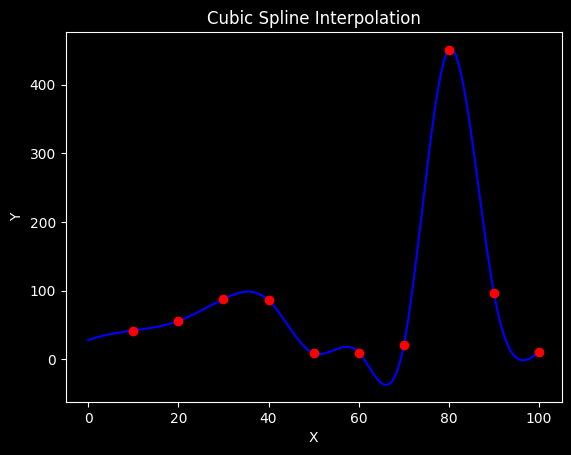

In [19]:
# Plot
plt.clf()
plt.plot(x_, y_, 'b')
plt.plot(X, Y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

To inference our newfound interpolation function, we can represent our function as a system of equations. Because it can be represented as such, we can use linear algebra to determine the values of the contants for the piecewise polynomial functions. We formulate the equation $Ax = b$ where $A$ represents the values of the constraints of the functions, where $b$ is the expected output ($y_{i}$ and $y_{i+1}$), and where $x$ represents $\lang a_1, b_1, c_1, d_1, a_2, b_2, c_2, d_2\rang$. Solving for $x$ gives us the necessary constants for the corresponding polynomial equations, so that we can use them to calculate the value of $x^*$. Luckily, we can use `sci-py` to do the tedious work for us.

In [21]:
# Print value of 15
f_cubic(15)

array(47.052266)

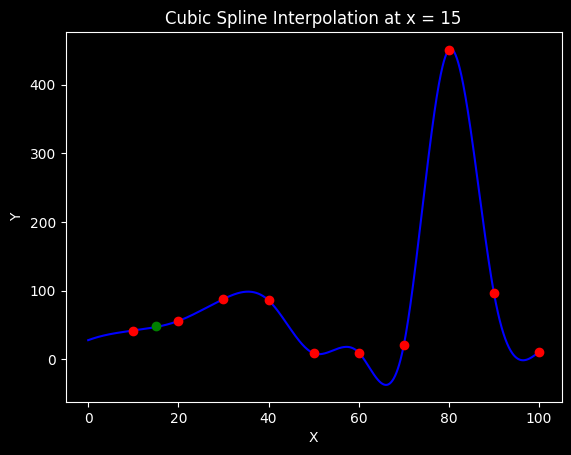

In [20]:
# Plot
plt.plot(x_, y_, 'b')
plt.plot(X, Y, 'ro')
plt.plot(15, x_star, 'go')
plt.title('Cubic Spline Interpolation at x = 15')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Here, the green dot represents the value of $x=15$ based on the cubic spline interpolation function.